## **Importing Libraries**
Importing all the libraries required for reading the datafile, processing the data, required ML models to train and test.

**LabelEncoder** - Onehotencoding the labels, finding unique classes and converting to a number representation between 0 to (n-1) unique classes.

In [74]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder

# Importing library for splitting the data
from sklearn.model_selection import train_test_split

# Importing regression models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

## **Uploading and reading the data files provided**

**Uploading the Datafile**<br>

*   spi_global_rankings.csv



In [ ]:
uploaded = files.upload()

Saving spi_global_rankings.csv to spi_global_rankings.csv


**Reading the uploaded data files**

In [141]:
path = io.BytesIO(uploaded['spi_global_rankings.csv'])
df = pd.read_csv(path)

In [142]:
df.head(3) # Printing the head to see the data in the movies data file

,rank,prev_rank,name,league,off,def,spi
0,1,1,Bayern Munich,German Bundesliga,3.37,0.34,94.33
1,2,2,Manchester City,Barclays Premier League,3.05,0.33,92.85
2,3,3,Liverpool,Barclays Premier League,2.85,0.33,91.44


In [143]:
df.shape

(630, 7)

## **Cleaning dataset**
Dropping any rows with NA values as they are noisy for training/testing a ML model.<br>
In this dataset as we can see by the shape of the dataset (before and after) no rows contained any NA values and so no rows were dropped.

In [144]:
print("Shape before dropping NA values: ",df.shape)
df.dropna(inplace=True)
print("Shape after dropping all rows with NA values: ", df.shape)

Shape before dropping NA values:  (630, 7)
Shape after dropping all rows with NA values:  (630, 7)


## **Visualizing the dataset**

* Plotting graph for 'spi' (target) vs rank
* Plotting Offensive vs 'spi'
* Plotting Deffensive vs 'spi'

From the following scatter plot we can see that the spi is directly related to the rank, i.e. higher the score the higher the rank and so it is a good predictor.

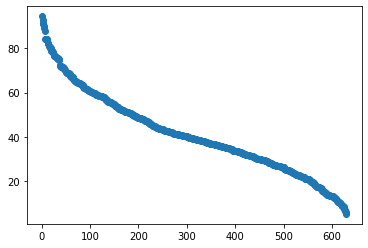

In [145]:
plt.scatter(df['rank'],df['spi'])

From the following plot we can see the higher the offensive rating of team is the higher the score of the team is and so is a good predictor.

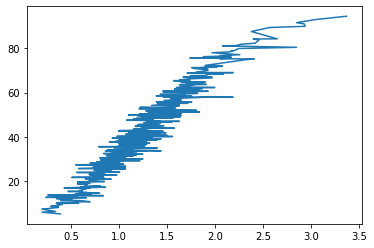

In [146]:
plt.plot(df['off'],df['spi'])

From the following plot we can see that the defensive rating is inversly related to the score, i.e. the lower the defensive rating the higher the teams score is and so can be used as a good predictor.

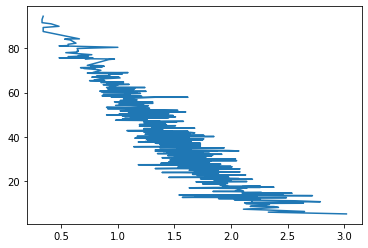

In [147]:
plt.plot(df['def'],df['spi'])

## **Pre-processing the data**
Creating label encoders and using them to fit and transform the features we want to do the one hot encoding on.

* Name Label - Converting the Name to a unique number, dont think if this is a useful feature but still preprocessed to see the difference it might make.
* League Label - Converting the League to a unique number, I considered this an important feature as Offensive and Defensive statistics make more sense within a league to get a teams performance score. As different leagues may have different distribution of these stats.
* SPI Label - Initially I didnt convert this feature to a label as this is the target we are regressing to, but as regression model doesnt like a float value and so rather than converting the target values to an int which would drop some information I converted them to a unique label, which retained more information than casting the values to an int.

In [148]:
nameLabel = LabelEncoder()
leagueLabel = LabelEncoder()
spiLabel = LabelEncoder()

**Pre-Processing labels for Name**<br>
using nameLabel encoder to fit and transform the Names of various teams in the dataset.

In [149]:
df['name'] = nameLabel.fit_transform(df["name"])
df.head(3)

,rank,prev_rank,name,league,off,def,spi
0,1,1,68,German Bundesliga,3.37,0.34,94.33
1,2,2,350,Barclays Premier League,3.05,0.33,92.85
2,3,3,332,Barclays Premier League,2.85,0.33,91.44


**Pre-Processing labels for League**<br>
using leagueLabel encoder to fit and transform the leagues in the dataset.

In [150]:
df['league'] = leagueLabel.fit_transform(df['league'])
df.head(3)

,rank,prev_rank,name,league,off,def,spi
0,1,1,68,15,3.37,0.34,94.33
1,2,2,350,3,3.05,0.33,92.85
2,3,3,332,3,2.85,0.33,91.44


**Pre-Processing labels for SPI**<br>
using spiLabel encoder to fit and transform the spi's given in the dataset.

In [151]:
df['spi'] = spiLabel.fit_transform(df['spi'])
df.head()

,rank,prev_rank,name,league,off,def,spi
0,1,1,68,15,3.37,0.34,603
1,2,2,350,3,3.05,0.33,602
2,3,3,332,3,2.85,0.33,601
3,4,4,62,28,2.93,0.41,600
4,5,6,426,12,2.94,0.48,599


## **Preparing the data**

Once we have all the values processed and in one data frame we now chose the features which will be usefull.

Before the values are extracted from the dataframe to a numpy array we shuffle the dataset just to make sure training and testing datasets are splitted evenly.

Features I considered to be good: League, Offensive, Defensive, and rank as we saw from the visualization of the dataset before and maybe the prev_rank features. The name is going to be unique to every team so doesnt add any value to the ML learning according to me and so was not used.

Features used: League, Offensive rating, Defensive rating, rank, prev_rank (dropping prev_rank reduced the coefficient of determination so it is used)

In [152]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)

target = 'spi'
predictors = list(df.columns)
predictors.remove(target)
predictors.remove('name')
# predictors.remove('prev_rank')

X = (df_shuffled[predictors]).values
y = (df_shuffled[target]).values
print(X.shape,y.shape)

(630, 5) (630,)


## **Splitting into training and testing datasets**

Test size use: 0.33 that is 1/3rd of the dataset is used for testing and 2/3rd is used for training.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

## **Training and Testing Regression Models**

**Models Used**

* Linear Regression
* Multi-Level Perceptron regressor - for a Neural network regressor with an input layer, a single hidden layer and an output layer. 

The Linear regression model has an R-squared score of 99.99%.

In [154]:
regM = LinearRegression().fit(X_train, y_train)
regM.score(X_test,y_test)

0.9999635017769091

The Multi-Level Perceptron regressor has a R-squared score of 93.67%

The max iteration of 1250 was found by testing multiple values untill the neural network was able to converge (no underfitting) but low enough so that there is as little possible overfitting.

In [156]:
mlpR = MLPRegressor(max_iter=1250).fit(X_train,y_train)
mlpR.score(X_test,y_test)

0.936716792661423

**Observations**

We can see that the Linear Regression model is able to understand and regress to the target with a pretty good R squared score of 99.99% (coefficient of determination), the linear regression model performs better than a simple Neural Network (Multi Level Perceptron) with a coefficient of determination of 93.67%.

**Future Work**

With the data points given we can plot a few more graphs which can tell us if there is any other corelation between the features, and which are the most usefull features to be used.